# Exploratory Data Analysis of the Lego Dataset

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the 'themes.csv' file

In [2]:
df_themes = pd.read_csv('files/themes.csv')
df_themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
650,685,Galidor,NaN
651,686,Chinese Traditional Festivals,NaN
652,687,Frozen II,608.0
653,688,DOTS,NaN


**Observation:**

**There are 655 Lego themes.**

## 3. Load the 'sets.csv' file

In [3]:
df_sets = pd.read_csv('files/sets.csv')
df_sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15661,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15662,XMASTREE-1,Christmas Tree,2019,410,26
15663,XWING-1,Mini X-Wing Fighter,2019,158,60
15664,XWING-2,X-Wing Trench Run,2019,158,52


## 4. Change the column name of the theme dataset from 'id' to 'theme_id'.

In [4]:
df_themes = df_themes.rename(columns = {'id':'theme_id'})
df_themes

,theme_id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
650,685,Galidor,NaN
651,686,Chinese Traditional Festivals,NaN
652,687,Frozen II,608.0
653,688,DOTS,NaN


## 5. Merge the themes and sets sub-datasets.

In [5]:
themes_sets = pd.merge(df_themes, df_sets, on = 'theme_id', how = 'left')
themes_sets

,theme_id,name_x,parent_id,set_num,name_y,year,num_parts
0,1,Technic,NaN,001-1,Gears,1965.0,43.0
1,1,Technic,NaN,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0
2,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985.0,191.0
3,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985.0,120.0
4,1,Technic,NaN,1039-1,Manual Control Set 1,1986.0,39.0
...,...,...,...,...,...,...,...
15737,689,Minions,NaN,75546-1,Minions in Gru’s Lab,2020.0,0.0
15738,689,Minions,NaN,75547-1,Minion Pilot in Training,2020.0,0.0
15739,689,Minions,NaN,75549-1,Unstoppable Bike Chase,2020.0,0.0
15740,689,Minions,NaN,75550-1,Minions Kung Fu Battle,2020.0,0.0


## 6. Rename 'name_x' and 'name_y' to 'theme_name' and 'set_name' respectively.

In [6]:
themes_sets = themes_sets.rename(columns = {'name_x':'theme_name','name_y':'set_name'})
themes_sets

,theme_id,theme_name,parent_id,set_num,set_name,year,num_parts
0,1,Technic,NaN,001-1,Gears,1965.0,43.0
1,1,Technic,NaN,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0
2,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985.0,191.0
3,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985.0,120.0
4,1,Technic,NaN,1039-1,Manual Control Set 1,1986.0,39.0
...,...,...,...,...,...,...,...
15737,689,Minions,NaN,75546-1,Minions in Gru’s Lab,2020.0,0.0
15738,689,Minions,NaN,75547-1,Minion Pilot in Training,2020.0,0.0
15739,689,Minions,NaN,75549-1,Unstoppable Bike Chase,2020.0,0.0
15740,689,Minions,NaN,75550-1,Minions Kung Fu Battle,2020.0,0.0


## 7. Checking dataset for missing values

In [7]:
themes_sets.isnull().sum()

theme_id         0
theme_name       0
parent_id     5939
set_num         76
set_name        76
year            76
num_parts       76
dtype: int64

## 8. Filling all missing values with the value with the most number of occurence(mode)

In [8]:
themes_sets['year'].value_counts().head()

2019.0    831
2018.0    802
2017.0    778
2015.0    765
2016.0    746
Name: year, dtype: int64

In [9]:
themes_sets['num_parts'].value_counts().head()

0.0    1663
1.0     368
6.0     364
7.0     310
4.0     307
Name: num_parts, dtype: int64

In [10]:
themes_sets['year'] = themes_sets['year'].fillna(themes_sets['year'].mode()[0])
themes_sets['num_parts'] = themes_sets['num_parts'].fillna(themes_sets['num_parts'].mode()[0])
themes_sets.isnull().sum()

theme_id         0
theme_name       0
parent_id     5939
set_num         76
set_name        76
year             0
num_parts        0
dtype: int64

## 9. Convert column values of 'year' and 'num_parts' from float to integer

In [11]:
themes_sets['year'] = themes_sets['year'].astype(int)
themes_sets['num_parts'] = themes_sets['num_parts'].astype(int)
themes_sets.head()

,theme_id,theme_name,parent_id,set_num,set_name,year,num_parts
0,1,Technic,NaN,001-1,Gears,1965,43
1,1,Technic,NaN,002-1,4.5V Samsonite Gears Motor Set,1965,3
2,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985,191
3,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985,120
4,1,Technic,NaN,1039-1,Manual Control Set 1,1986,39


## 10. Exploratory Data Analysis

### 10.a. What are the top 5 Lego themes with the most number of sets?

In [12]:
theme_count = themes_sets['theme_name'].value_counts().reset_index().rename(columns = {'index':'theme_name', 'theme_name':'set_count'})
theme_count.head(5)

,theme_name,set_count
0,Star Wars,846
1,Gear,553
2,Basic Set,546
3,Supplemental,534
4,Technic,447


<AxesSubplot:xlabel='theme_name', ylabel='set_count'>

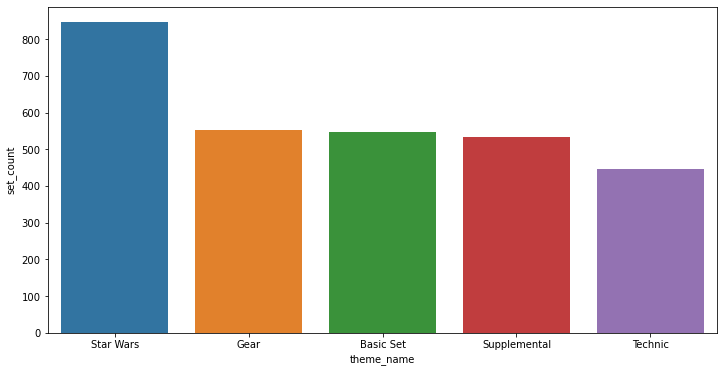

In [13]:
# Creating a bar graph
mpl.rcParams['figure.figsize'] = 12,6
sns.barplot(x = 'theme_name', y = 'set_count', data = theme_count.head(5))

**Observation:**

**The top 5 Lego themes with the most number of sets are:**

1. **Star Wars**
2. **Gear**
3. **Basic Set**
4. **Supplemental**
5. **Technic**

### 10.b. In what year did Lego released the most number of brick sets?

In [14]:
set_count_year = themes_sets['year'].value_counts().reset_index().rename(columns = {'index':'year', 'year':'set_count'})
set_count_year.head()

,year,set_count
0,2019,907
1,2018,802
2,2017,778
3,2015,765
4,2016,746


**Observation:**

**The year with the most number of brick set released by Lego was in 2019.**

### 10.c. What is the trend based on the number of brick sets per year?

In [15]:
# Adding two missing year values
df_add = pd.DataFrame([[1951, 0], [1952, 0]], columns = ['year', 'set_count'])

sets_per_year = set_count_year.sort_values("year", ascending = True).reset_index(drop=True)
sets_per_year = pd.concat([sets_per_year, df_add])
sets_per_year = sets_per_year.sort_values("year", ascending = True).reset_index(drop=True)
sets_per_year

,year,set_count
0,1949,5
1,1950,6
2,1951,0
3,1952,0
4,1953,4
...,...,...
67,2016,746
68,2017,778
69,2018,802
70,2019,907


<AxesSubplot:xlabel='year', ylabel='set_count'>

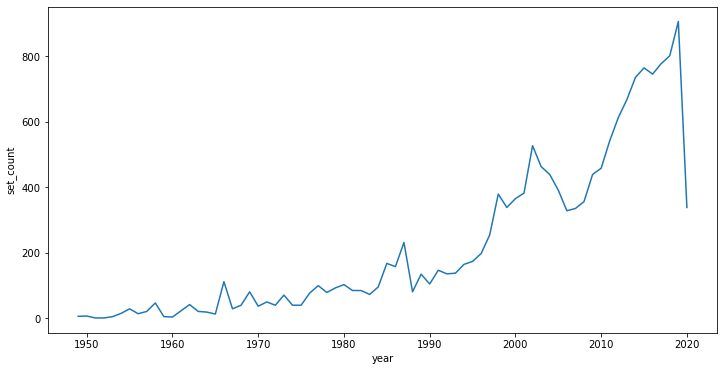

In [16]:
# Creating a line graph
mpl.rcParams['figure.figsize'] = 12,6
sns.lineplot(x = 'year', y = 'set_count', data = sets_per_year)

**Observation:**

1. The number of brick sets released is increasing by the year.
2. There was a sharp drop on the number of brick sets released in 2020.

### 10.d. What is the trend based on the number of brick parts per year?

In [17]:
parts_per_year = themes_sets.groupby(['year']).sum().reset_index()
parts_per_year.drop(['theme_id','parent_id'], axis = 1, inplace = True)

In [18]:
df_add = pd.DataFrame([[1951, 0], [1952, 0]], columns = ['year', 'num_parts'])
parts_per_year = pd.concat([parts_per_year, df_add])

In [19]:
parts_per_year = parts_per_year.sort_values("year", ascending = True).reset_index(drop=True)
parts_per_year

,year,num_parts
0,1949,498
1,1950,6
2,1951,0
3,1952,0
4,1953,54
...,...,...
67,2016,157940
68,2017,174986
69,2018,173419
70,2019,174027


<AxesSubplot:xlabel='year', ylabel='num_parts'>

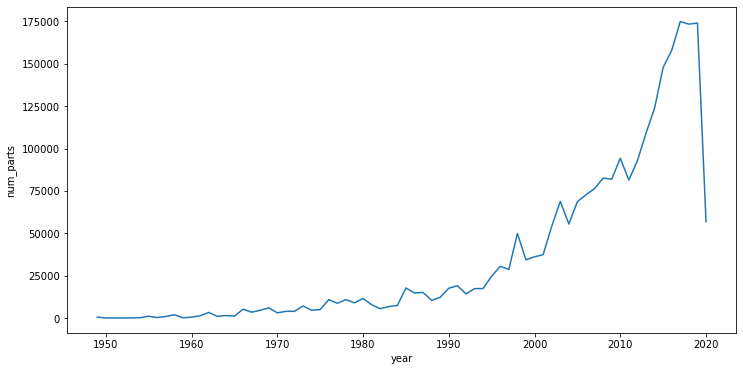

In [20]:
# Creating a line graph
sns.lineplot(x = 'year', y = 'num_parts', data = parts_per_year)

**Observation:**

1. From 1949 to 2017, the number of brick parts increased every year.
2. From 2017 to 2019. the number of brick parts remained between the 173k and 174k.
3. In 2020, the number of brick parts sharply fell due to the decreased production caused by the pandemic.

### 10.e. Which Lego theme has the most number of brick parts?

In [21]:
themes_parts = themes_sets.groupby(['theme_name']).sum().reset_index()
themes_parts = themes_parts.sort_values("num_parts", ascending = False).reset_index(drop=True)

In [22]:
themes_parts.drop(["theme_id","parent_id","year"], axis = 1, inplace = True)

In [23]:
themes_parts.head()

,theme_name,num_parts
0,Star Wars,187937
1,Basic Set,112179
2,Ultimate Collector Series,85004
3,Creator Expert,78542
4,Ninjago,66626


<AxesSubplot:xlabel='theme_name', ylabel='num_parts'>

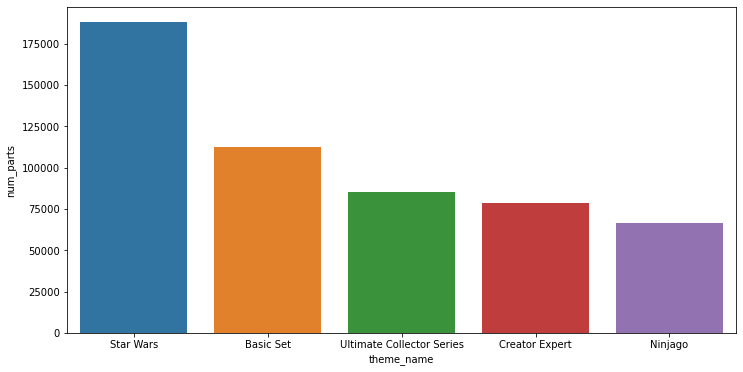

In [24]:
sns.barplot(x = 'theme_name', y = 'num_parts', data = themes_parts.head())

**Observation:**

**The top 5 themes with the most number of brick parts are:**
1. **Star Wars**
2. **Basic Set**
3. **Ultimate Collector Series**
4. **Creator Expert**
5. **Ninjago**